In [1]:
# Toggle code on or off

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Goals:

- Use for loops more effectively

- Expand use of python

- Use new statistical methods (something other than t-test, anova, chi-squared, linear regression)

## What variables differentially affect change in state uninsured rates post Affordable Care Act?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expressions
import scipy.stats
import datetime as dt
%matplotlib inline

The rate of uninsured individuals fell considerably post implementation of the Affordable Care Act. There is large variability in the effect size between states. This project will aim to explore what variables can potentially describe the variance in effect size. Understanding the variance in these changes could inform future legislation and could also be used to target externalities in the provision of healthcare.

In [14]:
state_aca_df = pd.read_csv('states.csv')

In [15]:
state_aca_df.head()

,State,uninsured_rate_2010,uninsured_rate_2015,uninsured_rate_change,insurance_coverage_change,employer_health_coverage_2015,marketplace_health_coverage_2016,marketplace_tax_credits_2016,average_monthly_tax_credit_2016,medicaid_expansion,medicaid_enrollment_2013,medicaid_enrollment_2016,medicaid_enrollment_change,medicare_enrollment_2016
0,Alabama,14.60%,10.10%,-4.50%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.90%,14.90%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.90%,10.80%,-6.10%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.50%,9.50%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.50%,8.60%,-9.90%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


# Exploring Data

First we need to take a look at variance and distribution of effect size in rate change and which variables correlated with this rate change.

In [16]:
#need to convert percentage strings to integer

state_aca_df['uninsured_rate_change']=state_aca_df.uninsured_rate_change.str.replace("%", "")

state_aca_df['uninsured_rate_change']=state_aca_df['uninsured_rate_change'].apply(pd.to_numeric)

state_aca_df['uninsured_rate_2010']=state_aca_df.uninsured_rate_2010.str.replace("%", "")

state_aca_df['uninsured_rate_2010']=state_aca_df['uninsured_rate_2010'].apply(pd.to_numeric)

state_aca_df['uninsured_rate_2015']=state_aca_df.uninsured_rate_2015.str.replace("%", "")

state_aca_df['uninsured_rate_2015']=state_aca_df['uninsured_rate_2015'].apply(pd.to_numeric)

#quick check

state_aca_df.head()


,State,uninsured_rate_2010,uninsured_rate_2015,uninsured_rate_change,insurance_coverage_change,employer_health_coverage_2015,marketplace_health_coverage_2016,marketplace_tax_credits_2016,average_monthly_tax_credit_2016,medicaid_expansion,medicaid_enrollment_2013,medicaid_enrollment_2016,medicaid_enrollment_change,medicare_enrollment_2016
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


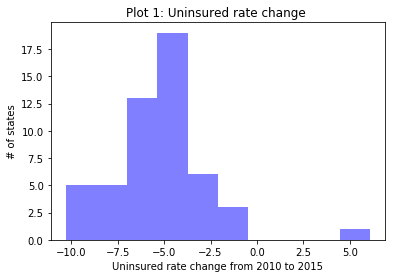

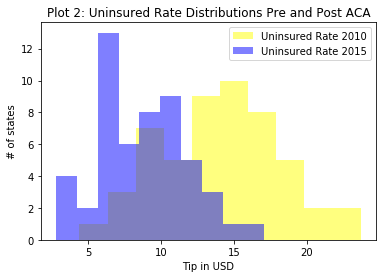

In [33]:
#looks good, so let's plot the histogram of this data

plt.hist(state_aca_df['uninsured_rate_change'], color='blue', alpha=.5,label='Uninsured rate change')
plt.xlabel('Uninsured rate change from 2010 to 2015')
plt.ylabel('# of states')
plt.title('Plot 1: Uninsured rate change ')
plt.show()


plt.hist(state_aca_df['uninsured_rate_2010'], color='yellow',  alpha=.5,label='Uninsured Rate 2010')  # alpha just controls the opacity
plt.hist(state_aca_df['uninsured_rate_2015'], color='blue', alpha=.5,label='Uninsured Rate 2015')

plt.xlabel('Tip in USD')
plt.ylabel('# of states')
plt.legend(loc='upper right')
plt.title('Plot 2: Uninsured Rate Distributions Pre and Post ACA')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expressions
import scipy.stats
import datetime as dt
%matplotlib inline

The data looks normally distributed as expected. The range in rate change is from -10.0% to +5.0%. By eye, it is hard to tell if the variance in uninsured rates has maintained consistent pre and post ACA. Let's take a closer look at the descriptive statistical variables to ensure that this is the case.

In [32]:
print('State Uninsured Rate stats - 2010')
print(state_aca_df['uninsured_rate_2010'].describe())
print("\n")
print('State Uninsured Rate stats - 2015')
print(state_aca_df['uninsured_rate_2015'].describe())

#Ratio of stf to mean pre and post ACA
print("\n")
print('Ratio of STD  to Mean for Uninsured Rate in 2010')
print(4.164/14.180769)
print("\n")
print('Ratio of STD  to Mean for Uninsured Rate in 2015')
print(3.142678/8.734615)

State Uninsured Rate stats - 2010
count    52.000000
mean     14.180769
std       4.164087
min       4.400000
25%      11.250000
50%      14.300000
75%      17.350000
max      23.700000
Name: uninsured_rate_2010, dtype: float64


State Uninsured Rate stats - 2015
count    52.000000
mean      8.734615
std       3.142678
min       2.800000
25%       6.250000
50%       8.650000
75%      10.900000
max      17.100000
Name: uninsured_rate_2015, dtype: float64


Ratio of STD  to Mean for Uninsured Rate in 2010
0.2936371081145176


Ratio of STD  to Mean for Uninsured Rate in 2015
0.3597958238571477


As expected there is larger relative variance in the state Uninsured Rate in 2015 as compared to 2010. This suggests that the effect of ACA wasn't homogenous among states. This is further corroborated by the distribution in Plot 1.

Accordingly, it should be investigated if there are any variables that predict the variance in effect size.

In [51]:
state_aca_df['State']=state_aca_df.State.str.replace(" ", "")
state_aca_df['State']=state_aca_df.State.str.lower()

#Create new binrary variable for political lean
#state_aca_df['political_lean']=np.where((state_aca_df['State'].isin(['california','washington','newmexico',
                                                                     #'michigan','illinois','oregon','pennsylvania', 'newyork',
                                                                     #'maryland','delaware','newjersey','conneticut','rhodeisland',
                                                                     #'massacheusets','vermont','newhampshire','maine','hawaii'])), 1, 0)

#might be better to create a categorical variable that includes neutral states
political_lean=[]

for row in state_aca_df['State']:
    # if more than a value,
    if row == ['california','washington','newmexico','michigan','illinois','oregon','pennsylvania', 'newyork',
               'maryland','delaware','newjersey','conneticut','rhodeisland','massacheusets','vermont','newhampshire','maine','hawaii']:
        # Append a scaled variable where 2=left leaning
        political_lean.append('2')
    # else, if more than a value,
    elif row ==['utah','wyoming','indiana','arizona','tennessee','montana','northdakota','southdakota','nebraska','kansas','mississipi','alabama']:
        # Append a scaled variable where 0= right leaning
        political_lean.append('0')
    # append a scaled variable where 1=neutral political lean
    else:
        political_lean.append('1')
    #create a column based on this output
state_aca_df['political_lean'] = political_lean
            
            
#quick check
print(state_aca_df['political_lean'])

#Create new variable for state gdp

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
Name: political_lean, dtype: object
